In [2]:
from transformers import BlipForImageTextRetrieval

### Loading model

In [42]:
model = BlipForImageTextRetrieval.from_pretrained('Salesforce/blip-itm-base-coco')

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/895M [00:00<?, ?B/s]

In [5]:
from transformers import AutoProcessor

In [43]:
processor = AutoProcessor.from_pretrained('Salesforce/blip-itm-base-coco')

preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/456 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [3]:
from PIL import Image

In [4]:
img = Image.open(r"C:\Users\DELL\Downloads\images.jpeg")

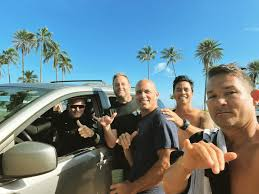

In [5]:
img

In [6]:
text = 'people taking selfie'

### Processing text and image

In [72]:
inputs = processor(images=img,
          text = text,
          return_tensors="pt")

In [73]:
inputs

{'pixel_values': tensor([[[[-0.6390, -0.6390, -0.6390,  ..., -0.2448, -0.2448, -0.2448],
          [-0.6390, -0.6390, -0.6390,  ..., -0.2448, -0.2448, -0.2448],
          [-0.6390, -0.6390, -0.6390,  ..., -0.2448, -0.2448, -0.2448],
          ...,
          [ 1.9011,  1.8865,  1.8865,  ...,  0.1639,  0.1785,  0.1785],
          [ 1.8135,  1.8135,  1.7990,  ...,  0.1785,  0.1785,  0.1785],
          [ 1.7698,  1.7698,  1.7552,  ...,  0.1785,  0.1785,  0.1785]],

         [[ 0.7392,  0.7392,  0.7392,  ...,  0.9943,  0.9943,  0.9943],
          [ 0.7392,  0.7392,  0.7392,  ...,  0.9943,  0.9943,  0.9943],
          [ 0.7392,  0.7392,  0.7392,  ...,  0.9943,  0.9943,  0.9943],
          ...,
          [ 2.0449,  2.0299,  2.0299,  ..., -0.5365, -0.5365, -0.5365],
          [ 1.9548,  1.9548,  1.9398,  ..., -0.5365, -0.5365, -0.5365],
          [ 1.9098,  1.9098,  1.8948,  ..., -0.5365, -0.5365, -0.5365]],

         [[ 1.8331,  1.8331,  1.8331,  ...,  1.8615,  1.8615,  1.8615],
          [ 1

### performing inference

In [74]:
output = model(**inputs)[0]

In [75]:
output

tensor([[-0.1557,  0.1570]], grad_fn=<AddmmBackward0>)

### Using torch to convert results in probability

In [76]:
import torch

In [77]:
prob = torch.nn.functional.softmax(output, dim=1)
prob

tensor([[0.4225, 0.5775]], grad_fn=<SoftmaxBackward0>)

In [78]:
print(f'The image and text are matched with a probability of {prob[0][1]}')

The image and text are matched with a probability of 0.57753986120224


# Image Captioning

In [9]:
from transformers import BlipForConditionalGeneration, BlipProcessor

In [2]:
captioning_model = BlipForConditionalGeneration.from_pretrained('Salesforce/blip-image-captioning-base')

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

### Using same image that we used for comparing query and image_text

In [10]:
text1 = 'photograph of'

In [16]:
captioning_processor  = BlipProcessor.from_pretrained('Salesforce/blip-image-captioning-base')

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [18]:
captioning_input = captioning_processor(images=img,
                     text=text1,
                     return_tensors='pt')

In [19]:
captioning_input

{'pixel_values': tensor([[[[-0.6390, -0.6390, -0.6390,  ..., -0.2448, -0.2448, -0.2448],
          [-0.6390, -0.6390, -0.6390,  ..., -0.2448, -0.2448, -0.2448],
          [-0.6390, -0.6390, -0.6390,  ..., -0.2448, -0.2448, -0.2448],
          ...,
          [ 1.9011,  1.8865,  1.8865,  ...,  0.1639,  0.1785,  0.1785],
          [ 1.8135,  1.8135,  1.7990,  ...,  0.1785,  0.1785,  0.1785],
          [ 1.7698,  1.7698,  1.7552,  ...,  0.1785,  0.1785,  0.1785]],

         [[ 0.7392,  0.7392,  0.7392,  ...,  0.9943,  0.9943,  0.9943],
          [ 0.7392,  0.7392,  0.7392,  ...,  0.9943,  0.9943,  0.9943],
          [ 0.7392,  0.7392,  0.7392,  ...,  0.9943,  0.9943,  0.9943],
          ...,
          [ 2.0449,  2.0299,  2.0299,  ..., -0.5365, -0.5365, -0.5365],
          [ 1.9548,  1.9548,  1.9398,  ..., -0.5365, -0.5365, -0.5365],
          [ 1.9098,  1.9098,  1.8948,  ..., -0.5365, -0.5365, -0.5365]],

         [[ 1.8331,  1.8331,  1.8331,  ...,  1.8615,  1.8615,  1.8615],
          [ 1

In [26]:
output_captioning = captioning_model.generate(**captioning_input)
output_captioning

F:\Data Science\Generative AI\generative_ai\lib\site-packages\transformers\generation\utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


tensor([[30522,  9982,  1997,  1037,  2177,  1997,  2111,   102]])

In [28]:
captioning_processor.decode(output_captioning[0])

'photograph of a group of people [SEP]'

In [29]:
import gradio as gr

In [37]:
def captioning(img, text = 'photograph of'):
    processed_input = captioning_processor(img, text, return_tensors='pt') 
    outputs = captioning_model.generate(**processed_input)

    results =captioning_processor.decode(outputs[0])

    return results

In [38]:
app = gr.Interface(
    fn = captioning,

    inputs = gr.Image(label='input', type='pil'),
    outputs = gr.Textbox(lines=3, placeholder='output will be displayed here')
)

In [39]:
app.launch(share=True)

Running on local URL:  http://127.0.0.1:7861

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


F:\Data Science\Generative AI\generative_ai\lib\site-packages\transformers\generation\utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [40]:
app.close()

Closing server running on port: 7861
